<a href="https://colab.research.google.com/github/ActiveStacks/ExperimentTwo/blob/main/EXPERIMENT_CODEBERTLLM_1E6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(path6)

In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
28263,28263,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",c.c.a.t.a.b(Environment.getExternalStorageDire...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,c.c.a.t.a.b(Environment.getExternalStorageDire...
28268,28268,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",if (str.startsWith(Environment.getExternalStor...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,if (str.startsWith(Environment.getExternalStor...
28269,28269,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",str2 = Environment.getExternalStorageDirectory...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,str2 = Environment.getExternalStorageDirectory...
28271,28271,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",return Environment.getExternalStorageDirectory...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return Environment.getExternalStorageDirectory...
28272,28272,App can read/write to External Storage. Any Ap...,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",String absolutePath = Environment.getExternalS...,high,exact,5.5,CWE-276,Incorrect Default Permissions,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,String absolutePath = Environment.getExternalS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441412,2944699,Insecure Implementation of SSL. Trusting all t...,RegexAnd,"['javax\\.net\\.ssl', 'TrustAllSSLSocket-Facto...",HttpsURLConnection.setDefaultHostnameVerifier(...,high,exact,7.4,CWE-295,Improper Certificate Validation,M3: Insecure Communication,MSTG-NETWORK-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,HttpsURLConnection.setDefaultHostnameVerifier(...
2447857,2951481,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String NOTIFICATION_GROUP...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String NOTIFICATION_GROUP...
2448562,2952312,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val DARK_MODE_KEY = ""darkMode""",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val DARK_MODE_KEY = ""user_str"""
2448563,2952313,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val COPY_TO_CLIPBOARD_KEY = ""cop...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val COPY_TO_CLIPBOARD_KEY = ""use..."


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
2448998,2952779,NaN,NaN,NaN,"tile[k] = Bitmap.createBitmap(tileset, j * loa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"tile[k] = Bitmap.createBitmap(tileset, j * loa..."
2448999,2952780,NaN,NaN,NaN,"loadedtileWidth, loadedtileHeight, matrix, fal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"loadedtileWidth, loadedtileHeight, matrix, fal..."
2449000,2952781,NaN,NaN,NaN,tile[k].setDensity(Bitmap.DENSITY_NONE);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tile[k].setDensity(Bitmap.DENSITY_NONE);
2449001,2952783,NaN,NaN,NaN,tileWidth = tile[0].getWidth();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileWidth = tile[0].getWidth();
2449002,2952784,NaN,NaN,NaN,tileHeight = tile[0].getHeight();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileHeight = tile[0].getHeight();


In [ ]:
df.shape

(2449003, 15)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,2.449003e+06,37916.000000,2.449003e+06
mean,1.422792e+06,6.792072,1.548222e-02
std,8.801311e+05,1.481854,1.234606e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,6.122505e+05,7.400000,0.000000e+00
50%,1.369810e+06,7.500000,0.000000e+00
75%,2.222326e+06,7.500000,0.000000e+00
max,2.952784e+06,8.800000,1.000000e+00


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,2449003
Description,28
Type,4
Pattern,28
Code,2438652
Severity,4
Input Case,2
CVSS,10
CWE_ID,12
CWE_Desc,12


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    2411087
1      37916
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
2448998,2952779,NaN,NaN,NaN,"tile[k] = Bitmap.createBitmap(tileset, j * loa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"tile[k] = Bitmap.createBitmap(tileset, j * loa..."
2448999,2952780,NaN,NaN,NaN,"loadedtileWidth, loadedtileHeight, matrix, fal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"loadedtileWidth, loadedtileHeight, matrix, fal..."
2449000,2952781,NaN,NaN,NaN,tile[k].setDensity(Bitmap.DENSITY_NONE);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tile[k].setDensity(Bitmap.DENSITY_NONE);
2449001,2952783,NaN,NaN,NaN,tileWidth = tile[0].getWidth();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileWidth = tile[0].getWidth();
2449002,2952784,NaN,NaN,NaN,tileHeight = tile[0].getHeight();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,tileHeight = tile[0].getHeight();


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
175,175,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""VectorDrawableCompat"", ""parser error"", ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e4);"
567,567,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(y, ""Compatibility shadow requested but c...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(y, ""user_str"");"
1220,1220,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""CSLCompat"", ""Failed to inflate ColorSta...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e2);"
1473,1473,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(""FragmentManager"", g.toString());",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", g.toString());"
1550,1550,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""TypefaceCompatApi21Impl"", e2.getClass()...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", e2.getClass().getName(), e2);"


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
2448476,2952222,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(tag, ""error parsing qr code"", e)",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(tag, ""user_str"", e)"
2448562,2952312,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val DARK_MODE_KEY = ""darkMode""",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val DARK_MODE_KEY = ""user_str"""
2448563,2952313,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","private const val COPY_TO_CLIPBOARD_KEY = ""cop...",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"private const val COPY_TO_CLIPBOARD_KEY = ""use..."
2448599,2952351,This App copies data to clipboard. Sensitive d...,RegexAnd,"['content\\.ClipboardManager', 'setPrimaryClip...",clipboardManager.setPrimaryClip(ClipData.newPl...,info,exact,0.0,NaN,NaN,NaN,MSTG-STORAGE-10,https://github.com/MobSF/owasp-mstg/blob/maste...,1,clipboardManager.setPrimaryClip(ClipData.newPl...
2448795,2952563,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...","final String versionKey = ""lastversion"";",warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"final String versionKey = ""user_str"";"


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    37916
0    37916
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

index    Description                                                                                 Type     Pattern                                                                                                                                                                                            Code                                                                                                                                                                                                                      Severity  Input Case  CVSS  CWE_ID   CWE_Desc                                          OWASP_Mobile                   OWSAP_MASVS      Reference                                                                                                                                                            Vulnerability_status  processed_code                                                                                                                                             

<Axes: >

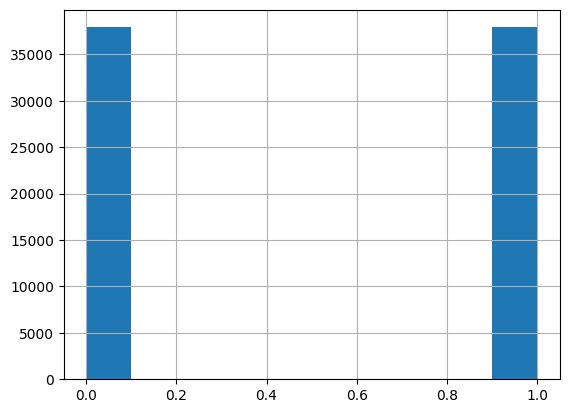

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,2242203,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.i(fragment.getClass().getSimpleName() + "" ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(fragment.getClass().getSimpleName() + ""u..."
1,2040634,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(AudioView.TAG, e);",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(AudioView.TAG, e);"
2,1332287,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(TAG, ""Exception reading cache "" + this.h...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + this.handle.getName(),..."
3,51820,NaN,NaN,NaN,public static final void checkItems(MaterialDi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final void checkItems(MaterialDi...
4,2372379,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.i(TAG, ""Java home:"" + System.getProperty(""...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(TAG, ""user_str"" + System.getProperty(""us..."


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
0,2242203,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(fragment.getClass().getSimpleName() + ""u..."
1,2040634,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(AudioView.TAG, e);"
2,1332287,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(TAG, ""user_str"" + this.handle.getName(),..."
3,51820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public static final void checkItems(MaterialDi...
4,2372379,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(TAG, ""user_str"" + System.getProperty(""us..."
5,1680706,RegexAnd,"['content\\.ClipboardManager', 'setPrimaryClip...",exact,0.0,NaN,MSTG-STORAGE-10,https://github.com/MobSF/owasp-mstg/blob/maste...,1,((ClipboardManager) this.f472a.getContext().ge...
6,2748462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"new ArchiveExtractor(fs, is, info.fileName, in..."
7,368196,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.out.println("" hex2bin <hex> <bin> <s..."
8,1947293,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"return Boxing.boxInt(Log.w(ConstantsKt.TAG, ""u..."
9,1725382,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(""user_str"", l.k(""user_str"", Integer.valu..."


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
75822,2252826,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(this.mDebugTag, ""user_str"" + msg);"
75823,2462622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,streamClusters.putAll(newBundle.streamClusters)
75824,2619571,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(LOG_TAG, ""extractFileListFromIntent() : ..."
75825,1048787,RegexAnd,['\\.setWebContentsDebuggingEnabled\\(true\\)'...,exact,5.4,M1: Improper Platform Usage,MSTG-RESILIENCE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,getViewModel().onWebViewRefreshed();
75826,2224998,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"return android.util.Log.w(TAG, th + ""\n"" + and..."
75827,2196111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"l(""<marker>"", new Object[0]);"
75828,2404162,Regex,setVisibility\(View\.GONE\)|setVisibility\(Vie...,exact,4.3,M1: Improper Platform Usage,MSTG-STORAGE-7,NaN,1,arrow_up.setVisibility(View.INVISIBLE);
75829,2235402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.models.remove(AdapterMessage.ViewType.FOL...
75830,2062900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,builder.setTitle(singleChoiceSettingDynamicDes...
75831,1854870,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(mergeInstances(new Converte...


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code
32,2864059,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File output = new File(context.getExternalFile...
84,402942,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"public static final String USERNAME = ""user_str"";"
91,2155526,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String SETTINGS_LAZY_LOADI...
93,614921,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"webView.postUrl(url_s + ""user_str"", EncodingUt..."
104,2393471,RegexOr,"['\\.getInstance\\(.*SHA-1', '\\.getInstance\\...",exact,5.9,M5: Insufficient Cryptography,MSTG-CRYPTO-4,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"SecureRandom.getInstance(""SHA1PRNG"").nextBytes..."
...,...,...,...,...,...,...,...,...,...,...
75747,899749,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return Environment.getExternalStoragePublicDir...
75752,2437297,RegexOr,"['\\.getExternalStorage', '\\.getExternalFiles...",exact,5.5,M2: Insecure Data Storage,MSTG-STORAGE-2,https://github.com/MobSF/owasp-mstg/blob/maste...,1,File myFile = new File(Environment.getExternal...
75760,2193193,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"static final String ERR_BAD_KEY = ""user_str"";"
75811,194516,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String ACTION_TEST_COPY_PA...


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,"Log.i(fragment.getClass().getSimpleName() + ""u...",1
1,"Log.w(AudioView.TAG, e);",1
2,"Log.d(TAG, ""user_str"" + this.handle.getName(),...",1
3,public static final void checkItems(MaterialDi...,0
4,"Log.i(TAG, ""user_str"" + System.getProperty(""us...",1


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,"Log.i(fragment.getClass().getSimpleName() + ""u...",1
1,"Log.w(AudioView.TAG, e);",1
2,"Log.d(TAG, ""user_str"" + this.handle.getName(),...",1
3,public static final void checkItems(MaterialDi...,0
4,"Log.i(TAG, ""user_str"" + System.getProperty(""us...",1


In [ ]:
df_balanced.head(5)

,text,labels
0,"Log.i(fragment.getClass().getSimpleName() + ""u...",1
1,"Log.w(AudioView.TAG, e);",1
2,"Log.d(TAG, ""user_str"" + this.handle.getName(),...",1
3,public static final void checkItems(MaterialDi...,0
4,"Log.i(TAG, ""user_str"" + System.getProperty(""us...",1


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 75832
    })
})

In [ ]:
from posixpath import split
split_dataset = codes_dataset['train'].train_test_split(test_size=0.2)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 60665
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 15167
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/60665 [00:00<?, ? examples/s]

Map:   0%|          | 0/15167 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=3,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis=-1)
  acc=np.mean(predictions == labels)
  f1 = f1_score(labels, predictions, average = 'binary')
  return {'accuracy' : acc, 'f1':f1}

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['test'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-56-e5df01f81142>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.053800,0.080973,0.980814,0.981115
2,0.032300,0.041462,0.990506,0.990556
3,0.025400,0.037104,0.992484,0.992521


TrainOutput(global_step=11376, training_loss=0.04664762479511159, metrics={'train_runtime': 3941.2845, 'train_samples_per_second': 46.177, 'train_steps_per_second': 2.886, 'total_flos': 4.78848965202432e+16, 'train_loss': 0.04664762479511159, 'epoch': 3.0})